In [1]:
import numpy as np 
import pandas as pd 

train = pd.read_csv('./train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
y_train = train['label'].to_numpy()
x_train = train.drop(['label'], axis=1).astype('float32').to_numpy()

# LeNet - 5

## Reshaping
LeNet - 5 operates on (n,n,1) array so we need to reshape our training data.

In [3]:
x_train_img = x_train.reshape((x_train.shape[0], 28, 28, 1))

## Train

In [4]:
import tensorflow as tf
import tensorflow.keras.layers as layers

model = tf.keras.Sequential([
    layers.Conv2D(6, (5, 5), strides=(1,1)),
    layers.AveragePooling2D(pool_size=2, strides=(2,2)),
    layers.Conv2D(16, (5,5), strides=(1,1)),
    layers.AveragePooling2D(pool_size=2, strides=(2,2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train_img, y_train, epochs=50)

Epoch 1/50
1313/1313 [==============================] - 9s 4ms/step - loss: 2.0317 - accuracy: 0.7988
Epoch 2/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.4130 - accuracy: 0.9119
Epoch 3/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.2727 - accuracy: 0.9327
Epoch 4/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.2031 - accuracy: 0.9460
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1684 - accuracy: 0.9534
Epoch 6/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1425 - accuracy: 0.9597
Epoch 7/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1224 - accuracy: 0.9633
Epoch 8/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1074 - accuracy: 0.9673
Epoch 9/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0934 - accuracy: 0.9712
Epoch 10/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.085

<Axes: >

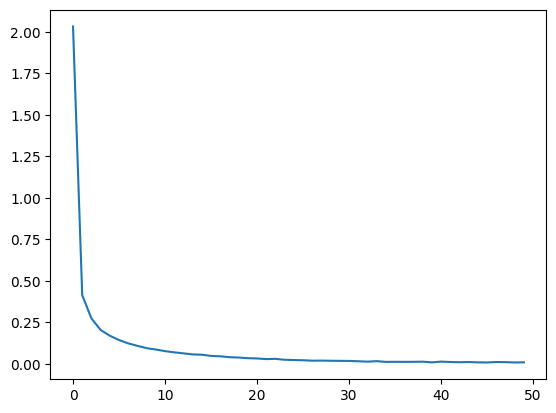

In [5]:
import seaborn as sns

loss = hist.history['loss']
sns.lineplot(loss)

## Predict

In [6]:
y_pred = model.predict(x_train_img)
y_class = np.argmax(y_pred, axis=1)
accu = np.mean(y_class == y_train)
print(f'Accuracy {round(accu * 100, 2)}%')

1313/1313 [==============================] - 2s 2ms/step
Accuracy 99.65%


## Submission

In [7]:
test = pd.read_csv('./test.csv')
test['id'] = test.index + 1

test_img = test.drop('id', axis=1).astype('float32').to_numpy().reshape((test.shape[0], 28,28,1))

In [8]:
y_pred_test = model.predict(test_img)
y_class_test = np.argmax(y_pred_test, axis=1)

output = pd.DataFrame({'ImageId': test.id, 'Label': y_class_test})
output.to_csv('submission.csv', index=False)

875/875 [==============================] - 2s 2ms/step
